# Taxi Trip Fare Prediction
**Overview**

BigQuery is Google's fully managed, NoOps, low cost analytics database. With BigQuery you can query terabytes and terabytes of data without having any infrastructure to manage, or needing a database administrator.

BigQuery Machine Learning BQML is where data analysts can create, train, evaluate, and predict with machine learning models with minimal coding.

In this you will explore millions of New York City yellow taxi cab trips available in a BigQuery Public Dataset. You will create a machine learning model inside of BigQuery to predict the fare of the cab ride given your model inputs and evaluate the performance of your model and make predictions with it.

perform the following tasks:

Query and explore the public taxi cab dataset.
Create a training and evaluation dataset to be used for batch prediction.
Create a forecasting (linear regression) model in BQML.
Evaluate the performance of your machine learning model.

There are several model types to choose from:

Forecasting numeric values like next month's sales with Linear Regression (linear_reg).
Binary or Multiclass Classification like spam or not spam email by using Logistic Regression (logistic_reg).
k-Means Clustering for when you want unsupervised learning for exploration (kmeans).

Note: There are many additional model types used in Machine Learning (like Neural Networks and decision trees) and available using libraries like TensorFlow. At this time, BQML supports the three listed above. Follow the BQML roadmap for more information.

For reference sake of you we also released notebook which is available in this try to explore from that .use AutoMl foundational Models to automatically selecting important features from dataset and Model selection .

you can also go with spectral clustering algorithms upcourse it is not an unsupervised task but it is correlated ,visualize the Fare trip prices .so that cab drive easily identifies fare trips in their respective locations .

Build a Forecasting model which helps for cab drives like (uber,rapido) which reach their customers easily and short time

**Dataset :**

⏱️ 'trip_duration': How long did the journey last?[in Seconds]

🛣️ 'distance_traveled': How far did the taxi travel?[in Km]

🧑‍🤝‍🧑 'num_of_passengers': How many passengers were in the taxi?

💵 'fare': What's the base fare for the journey?[In INR]

💲 'tip': How much did the driver receive in tips?[In INR]

🎀 'miscellaneous_fees': Were there any additional charges during the trip?e.g. tolls, convenience fees, GST etc.[In INR]

💰 'total_fare': The grand total for the ride (this is your prediction target!).[In INR]

⚡ 'surge_applied': Was there a surge pricing applied? Yes or no?

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("/kaggle/input/taxi-trip-fare-prediction/taxi_fare/train.csv")
print(df.shape)
df.head()

(209673, 8)


,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [47]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


Checking the missing values.

In [29]:
df.isna().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [44]:
# import seaborn as sns

# sns.pairplot(df)
# plt.show()

Using matplotlib for the each 2 pairs of columns:

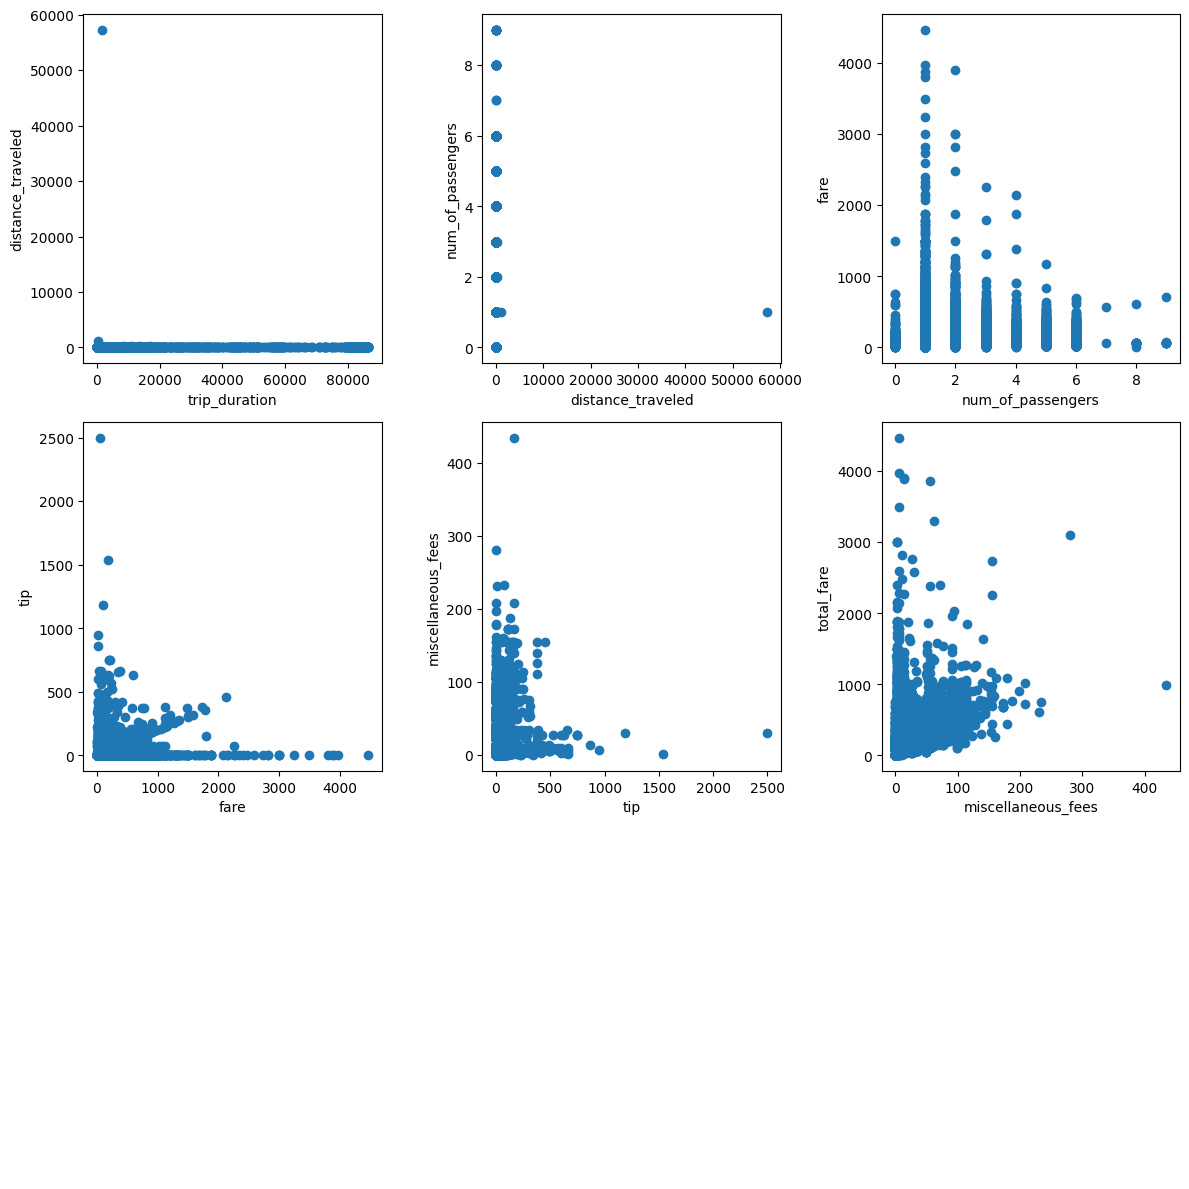

In [46]:
# Create scatter plots using Matplotlib
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each pair of features and plot scatter plot
for i, ax in enumerate(axes):
    if i < len(df.columns[:-1]) - 1:
        ax.scatter(df.iloc[:, i], df.iloc[:, i + 1], marker='o')
        ax.set_xlabel(df.columns[i])
        ax.set_ylabel(df.columns[i + 1])
    else:
        ax.axis('off')  # Turn off empty subplot

plt.tight_layout()
plt.show()

Splitting the data

In [30]:
X = df.drop('surge_applied', axis=1).values  ## .values to get numpy array
X.shape

(209673, 7)

In [31]:
y = df['surge_applied'].values
print(type(y))
y.shape

<class 'numpy.ndarray'>


(209673,)

Although this is a classification problem and the output value is a binary classification problem, we used the linear regression and used a 0.5 threshold to classify the output.

In [32]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y) # Train the model

# Make predictions
predictions = reg.predict(X)  # Using the train data for prediction
predictions = (predictions > 0.5) * 1 
print(predictions[:5], y[:5])

### Accuracy
# Compute MSE, RMSE, MAE, R^2
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)

print("\nMean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R^2):", r2)

[0 0 1 0 0] [0 0 1 0 0]

Mean Squared Error (MSE): 0.02490544800713492
Root Mean Squared Error (RMSE): 0.1578146001076419
Mean Absolute Error (MAE): 0.02490544800713492
Coefficient of Determination (R^2): 0.8766016324516308


In the next cell we create a classifier model rather than regression.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiation create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the trained X
y_pred = knn.predict(X)


# Print the predictions
print("Predictions: {}\nReal values: {}".format(y_pred[:5], y[:5])) 

### Accuracy
# Print the accuracy
print(knn.score(X, y))

Predictions: [0 0 1 0 0]
Real values: [0 0 1 0 0]
0.9889589980588822


Obviously, since we are taking the results on the trained data, the accuracy is very good. Let's import the test dataset and test the model accuracy on it.

In [34]:
df_test = pd.read_csv("/kaggle/input/taxi-trip-fare-prediction/taxi_fare/test.csv")
df_test.shape

(89861, 8)

In [35]:
X_test = df_test.drop('surge_applied', axis=1).values
y_test = df_test['surge_applied'].values

Testing the model performance on unseen data.

In [36]:
# Make predictions
predictions = reg.predict(X_test)  # Using the train data for prediction
predictions = (predictions > 0.5) * 1 
print(predictions[:5], y_test[:5])

# Compute MSE, RMSE, MAE, R^2
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("\nMean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R^2):", r2)

[0 0 0 0 0] [0 0 0 0 0]

Mean Squared Error (MSE): 0.2681586005052247
Root Mean Squared Error (RMSE): 0.5178403233673723
Mean Absolute Error (MAE): 0.2681586005052247
Coefficient of Determination (R^2): -0.3235982664753203


In [38]:
# Predict the labels for the trained X
y_pred = knn.predict(X_test)

# Print the predictions
print("Predictions: {}\nReal values: {}".format(y_pred[:5], y_test[:5])) 

### Accuracy
# Print the accuracy
print("The accuracy is: ", knn.score(X_test, y_test))

Predictions: [0 0 0 0 0]
Real values: [0 0 0 0 0]
0.7176973325469336


Let's work further and check the model complexity for the KNN model.

In [40]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X, y)
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X, y)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9933086281972404, 3: 0.992869849718371, 4: 0.9905614933730141, 5: 0.9901656388757732, 6: 0.9889589980588822, 7: 0.9883151383344542, 8: 0.9874423507080072, 9: 0.9868509536277918, 10: 0.986145092596567, 11: 0.9857063141176976, 12: 0.9852818436327042} 
 {1: 0.7245078510143443, 2: 0.7175749212672906, 3: 0.7174191250931995, 4: 0.7176416910561868, 5: 0.7175860495654399, 6: 0.7176973325469336, 7: 0.7176639476524855, 8: 0.717708460845083, 9: 0.717708460845083, 10: 0.717708460845083, 11: 0.7176862042487843, 12: 0.717708460845083}


Below shows the model complexity curve

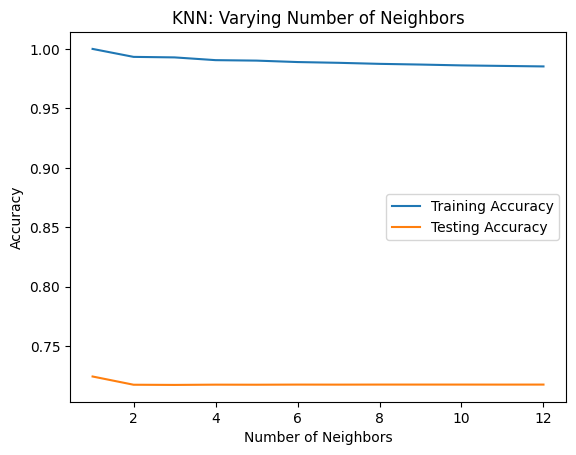

In [41]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

As the results suggest, increasing the number of neighbors more than 2 doesn't affect the acuracy. The model performance is the best on 1 or two neghbors.

One of the steps that has not been done here is the normalization step. We need to normalize the data in the columns to make the predictions more accurate.